<figure>
  <IMG SRC="https://raw.githubusercontent.com/mbakker7/exploratory_computing_with_python/master/tudelft_logo.png" WIDTH=250 ALIGN="right">
</figure>

# Exploratory Computing with Python
*Developed by Mark Bakker*
## Notebook 6: 线性方程组

在这篇笔记中，我们学习如何构建和求解线性方程组，并将这些技术应用于解决实际问题。

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 构建和求解线性方程组
抛物线由三个点定义（前提是它们不在同一条直线上）。  
抛物线的方程为 $y=ax^2+bx+c$，其中 $a$、$b$ 和 $c$ 是常数。  
给定三个点 $(x_1,y_1)$、$(x_2,y_2)$、$(x_3,y_3)$，可以编写以下三个线性方程组：

$
\begin{split}
x_1^2a+x_1b+c&=y_1 \\
x_2^2a+x_2b+c&=y_2 \\
x_3^2a+x_3b+c&=y_3 \\
\end{split}
$

或者用矩阵形式表示：

$
\left(
\begin{array}{ccc}
x_1^2 & x_1 & 1 \\
x_2^2 & x_2 & 1 \\
x_3^2 & x_3 & 1 \\
\end{array}
\right)
\left(
\begin{array}{c}
a \\b \\c \\
\end{array}
\right)
=
\left(
\begin{array}{c}
y_1 \\
y_2 \\
y_3 \\
\end{array}
\right)
$

为了解决这个问题，我们构建一个包含矩阵的二维数组（称为 `A`），以及一个包含右侧的一维数组（称为 `rhs`）。  
让我们对三个点 $(x_1,y_1)=(-2,2)$、$(x_2,y_2)=(1,-1)$、$(x_3,y_3)=(4,4)$ 进行这个操作。

In [3]:
xp = np.array([-2, 1, 4])
yp = np.array([2, -1, 4])
A = np.zeros((3, 3))
rhs = np.zeros(3)
for i in range(3):
    A[i] = xp[i] ** 2, xp[i], 1  # Store one row at a time
    rhs[i] = yp[i]
print('Array A:')
print(A)
print('rhs:',rhs)

Array A:
[[ 4. -2.  1.]
 [ 1.  1.  1.]
 [16.  4.  1.]]
rhs: [ 2. -1.  4.]


这个系统可以使用 `numpy` 的 `linalg` 子包中的 `solve` 方法进行求解。`solve` 方法接受一个二维数组（矩阵）和一个一维数组（右侧）作为输入，并返回解。为了检查解是否正确，我们需要对存储在数组 `A` 中的矩阵和我们称之为 `sol` 的获得解进行矩阵乘法。
正如我们所学，`A * sol` 是逐项相乘。对于矩阵乘法，需要使用 `@` 符号（另外，也可以使用 `np.dot` 函数；在 Python 2 中 `@` 符号不起作用）。

In [4]:
sol = np.linalg.solve(A, rhs)
print('solution is:', sol)
print('specified values of y:', yp)
print('A @ sol:', A @ sol)

solution is: [ 0.44444444 -0.55555556 -0.88888889]
specified values of y: [ 2 -1  4]
A @ sol: [ 2. -1.  4.]


我们还可以通过绘制这三个点和抛物线来直观检查我们是否正确解决了问题。

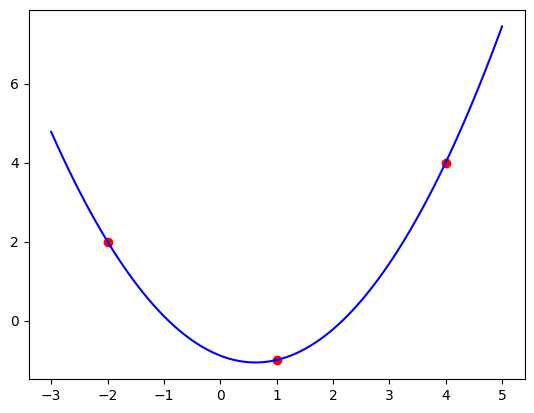

In [5]:
plt.plot(xp, yp, 'ro')
x = np.linspace(-3, 5, 100)
y = sol[0] * x ** 2 + sol[1] * x + sol[2]
plt.plot(x, y, 'b');

### 练习 1. <a name="back1"></a>拟合波形
考虑以下四个在时间 $t$ 处的 $y$ 量测值：$(t_0,y_0)=(0,3)$、$(t_1,y_1)=(0.25,1)$、$(t_2,y_2)=(0.5,-3)$、$(t_3,y_3)=(0.75,1)$。这些测量值是可以表示为以下波形的一部分：

$y = a\cos(\pi t) + b\cos(2\pi t) + c\cos(3\pi t) + d\cos(4\pi t)$

其中 $a$、$b$、$c$ 和 $d$ 是参数。构建一个包含四个线性方程的系统，并求解这四个参数。创建一个波形图，其中 $t$ 从 0 到 1，并用点表示这四个测量值。

solution is: [ 1.  2.  1. -1.]
specified values of y: [ 3  1 -3  1]
A @ sol: [ 3.  1. -3.  1.]


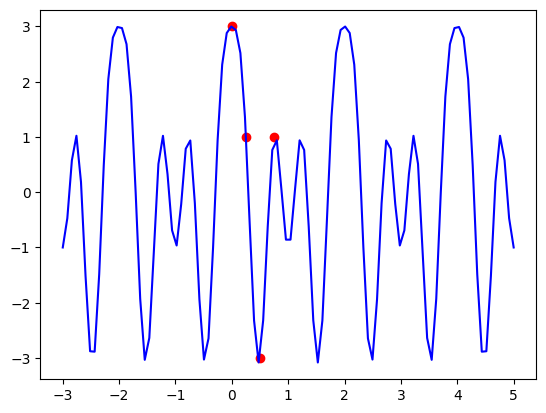

In [10]:
tp = np.array([0, 0.25, 0.5, 0.75])
yp = np.array([3, 1, -3, 1])
A = np.zeros((4, 4))
rhs = np.zeros(4)

for i in range(4):
    A[i] = [np.cos(np.pi * tp[i]), np.cos(2 * np.pi * tp[i]), np.cos(3 * np.pi * tp[i]), np.cos(4 * np.pi * tp[i])]
    rhs[i] = yp[i]

sol = np.linalg.solve(A, rhs)
print('solution is:', sol)
print('specified values of y:', yp)
print('A @ sol:', A @ sol)

plt.plot(tp, yp, 'ro')
x = np.linspace(-3, 5, 100)
y = sol[0] * np.cos(np.pi * x) + sol[1] * np.cos(2 * np.pi * x) + sol[2] * np.cos(3 * np.pi * x) + sol[3] * np.cos(4 * np.pi * x)
plt.plot(x, y, 'b')
plt.show()


<a href="#ex1answer">Answers to Exercise 1</a>

### 拟合任意多项式
在接下来的三个练习中，我们将拟合一个任意阶数 $N$ 的多项式到一组 $N+1$ 个数据点。我们要拟合的函数是

$$f(x) = a_0 + a_1x + a_2x^2 + ... + a_Nx^N = \sum\limits_{n=0}^{N}a_nx^n$$

请注意，有 $N+1$ 个参数 $a_n$，而多项式的阶数称为 $N$。

### 练习 2. <a name="back2"></a>`fpoly` 函数
首先，编写一个名为 `fpoly` 的函数，该函数返回一个数组，其中第 $n$ 项等于 $x^n$。该函数的输入参数为 $x$ 的值和多项式的阶数 $N$。函数的输出是一个长度为 $N+1$ 的数组。通过执行以下代码来测试你的函数，当 $x=2$ 和 $N=4$ 时：

`print fpoly(2, 4)`

这应该返回 `[  1.   2.   4.   8.  16.]`。

In [11]:
def fpoly(x, N):
    rv = np.zeros(N + 1)
    for n in range(N + 1):
        rv[n] = x ** n
    return rv

print(fpoly(2, 4))

[ 1.  2.  4.  8. 16.]


<a href="#ex2answer">Answers to Exercise 2</a>

### 练习 3. <a name="back3"></a>`solvepoly` 函数
接下来，编写一个函数来计算参数 $a_n$，以拟合一个经过 $N+1$ 个数据点的阶数为 $N$ 的多项式。将该函数命名为 `solvepoly`。函数的输入参数是一个长度为 $N+1$ 的数组 $x$ 和一个长度为 $N+1$ 的数组 $y$。输出是一个参数数组 $a_n$，使得阶数为 $N$ 的多项式恰好通过 $N+1$ 个数据点 $x$ 和 $y$。

在函数内部，你需要计算一个 $N+1$ 个方程的矩阵，以求解 $N+1$ 个未知参数。对于矩阵的每一行，调用 `fpoly` 函数。通过执行以下四个命令来测试你的函数。如果你的代码正确，参数数组 `a` 应为 `[ 3.          2.33333333 -6.          1.66666667]`。


    xp = np.array([0, 1, 2, 3])
    yp = np.array([3, 1, -3, 1])
    a = solvepoly(xp, yp)
    print(a)

In [28]:

def solvepoly(x, y):
    N = len(x) - 1
    A = np.vander(x, N + 1)
    a = np.linalg.solve(A, y)
    return a

xp = np.array([0, 1, 2, 3])
yp = np.array([3, 1, -3, 1])
a = solvepoly(xp, yp)
print(a)

[ 1.66666667 -6.          2.33333333  3.        ]


<a href="#ex3answer">Answers to Exercise 3</a>

### 练习 4. <a name="back3"></a>`fpolyeval` 函数
最后，编写一个名为 `fpolyeval` 的函数，以评估函数 $f(x) = \sum\limits_{n=0}^{N}a_nx^n$，给定参数 $a$ 和一组 $x$ 值。`fpolyeval` 函数接受一个任意长度的数组 $x$ 和一个长度为 $N+1$ 的参数数组 $a$ 作为输入参数。该函数返回一个长度与 $x$ 相同的 $f(x)$ 值数组。

首先，通过执行以下代码测试你的函数：

`fpolyeval(xp, a)`

其中 `xp` 是在练习 3 中输入的值的数组，`a` 是在练习 3 中计算的参数。当你正确编写所有代码时，该函数应该返回练习 3 中指定的四个值 `yp`。进一步测试你的函数，通过运行以下命令，这应该将练习 3 中的四个数据点作为标记绘制出来，并绘制经过这四个点的 3 次多项式。

    x = np.linspace(-1, 4, 100)
    y = fpolyeval(x, a)
    plt.plot(xp, yp, 'ko', label='data')
    plt.plot(x, y, label='fitted poly')
    plt.legend(loc='best');


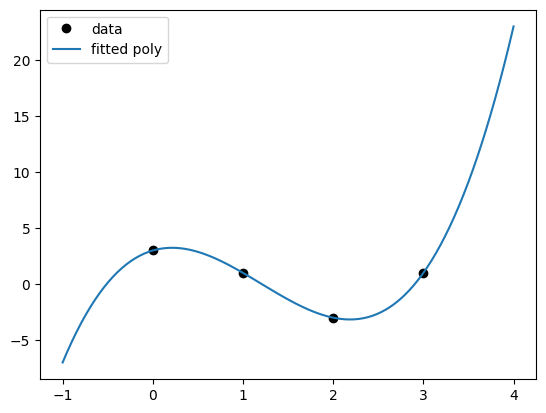

In [30]:
import numpy as np
import matplotlib.pyplot as plt

def fpolyeval(x, a):
    """评估多项式 f(x) = sum(a_n * x^n)"""
    a = np.asarray(a)
    N = len(a)
    result = np.zeros_like(x, dtype=float)
    for n in range(N):
        result += a[n] * (x ** n)  # 累加每一项
    return result

xp = np.array([0, 1, 2, 3])
yp = np.array([3, 1, -3, 1])
a = np.array([3.0, 2.33333333, -6.0, 1.66666667]) 

evaluated_values = fpolyeval(xp, a)

x = np.linspace(-1, 4, 100)
y = fpolyeval(x, a)
plt.plot(xp, yp, 'ko', label='data')
plt.plot(x, y, label='fitted poly')
plt.legend(loc='best');

<a href="#ex4answer">Answers to Exercise 4</a>

### 一维地下水流动
考虑一个被粘土层覆盖的沙层。沙层两侧各有一个水位固定的沟渠，左侧水位为 $h_1^*$，右侧水位为 $h_2^*$；两个沟渠之间的距离为 $L$。水通过粘土层以恒定速率 $P$ 渗漏（见图）。沙层中的地下水头由以下二阶常微分方程控制：

$$\frac{\text{d}^2h}{\text{d}x^2} = -\frac{P}{kD}$$

其中 $h$ 是水头，$k$ 是沙层的水力导率，$D$ 是沙层的厚度。边界条件为 $h=h_1^*$ 在 $x=0$ 和 $h=h_2^*$ 在 $x=L$。

<img src="http://i.imgur.com/2DH0sxT.png" alt="Consolidation" width=400pt>

虽然这个问题可以精确求解，但我们将在这里使用有限差分法进行数值求解（这也允许 $P$ 是 $x$ 的函数，例如）。水头在从 $x=0$ 到 $x=L$ 的 $N+1$ 个等间距点处计算。这些点标记为 $x_0$ 到 $x_{N}$，其中 $x_n=n\Delta x$，$\Delta x$ 是点之间的水平距离。点 $x_n$ 处的水头称为 $h_n$。二阶导数可以近似为（见 e.g. Verrujt (2012) Soil Mechanics, Eq. 17.4；可以在 [这里](http://geo.verruijt.net/) 找到这本书的完整 PDF 链接）。

$$\frac{\text{d}^2h}{\text{d}x^2} \approx \frac{1}{\Delta x} \left[ \frac{h_{n+1}-h_n}{\Delta x} - \frac{h_{n}-h_{n-1}}{\Delta x} \right]= \frac{h_{n-1}-2h_n+h_{n+1}}{(\Delta x)^2}$$

将这一导数近似代入微分方程并重新排列项得到

$$h_{n-1}-2h_n+h_{n+1} = -P\frac{(\Delta x)^2}{kD}$$

对于每个点 $n$ 都可以写出这样的方程，除了第一个和最后一个点，在那里我们需要应用边界条件：

$$h_0=h_1^* \qquad h_N=h_2^*$$

当 $N=4$ 时，我们需要求解一个包含 $N+1=5$ 个线性方程的系统，未知数为 $h_0$ 到 $h_4$：

$$\begin{split}
h_0 &= h_1^*  \\
h_{0}-2h_1+h_{2} &= -P\frac{(\Delta x)^2}{kD} \\
h_{1}-2h_2+h_{3} &= -P\frac{(\Delta x)^2}{kD} \\
h_{2}-2h_3+h_{4} &= -P\frac{(\Delta x)^2}{kD} \\
h_4 &= h_2^* 
\end{split}$$

或者用矩阵形式表示为

$$
\left(
\begin{array}{ccccc}
1 & 0 & 0 & 0 & 0 \\
1 & -2 & 1 & 0 & 0 \\
0 & 1 & -2 & 1 & 0 \\
0 & 0 & 1 & -2 & 1 \\
0 & 0 & 0 & 0 & 1 \\
\end{array}
\right)
\left(
\begin{array}{c}
h_0 \\
h_1 \\
h_2 \\
h_3 \\
h_4 \\
\end{array}
\right)
=
\left(
\begin{array}{c}
h_1^* \\
-P\frac{(\Delta x)^2}{kD} \\
-P\frac{(\Delta x)^2}{kD} \\
-P\frac{(\Delta x)^2}{kD} \\
h_2^* \\
\end{array}
\right)
$$

请注意，矩阵主要由零组成。该矩阵称为三对角矩阵，因为只有在矩阵的三条对角线上有值。可以通过指定对角线的值和位置来构建矩阵。主对角线的位置编号为零，长度为 $N+1$。主对角线正上的对角线的位置编号为 $+1$，长度为 $N$；而主对角线下方的对角线的位置编号为 $-1$，长度也为 $N$。`np.diag` 函数创建一个只包含一条对角线的矩阵。输入参数是一个具有正确长度的数组，其中包含对角线上的值和对角线的位置。可以按如下方式构建矩阵：

In [31]:
N = 4
d0 = -2 * np.ones(N + 1)  # main diagonal
d0[0] = 1  # first value of main diagonal is 1
d0[-1] = 1 # last value of main diagonal is 1
dplus1 = np.ones(N) # diagonal right above main diagonal, position 1
dplus1[0] = 0    # first value of diagonal is 0
dmin1 = np.ones(N)  # diagonal right below main diagonal, position -1
dmin1[-1] = 0    # last value of diagonal is 0
A = np.diag(d0, 0) + np.diag(dplus1, 1) + np.diag(dmin1, -1)
print(A)

[[ 1.  0.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.]
 [ 0.  1. -2.  1.  0.]
 [ 0.  0.  1. -2.  1.]
 [ 0.  0.  0.  0.  1.]]


请注意，上述描述的有限差分法在使用合理数量的点时是准确的。四个点可能不够。你可以通过例如将点数加倍并比较两个解来判断是否使用了足够的点。

### 练习 5. <a name="back5"></a>两个沟渠之间的水头

计算沙层中的水头分布，该沙层两侧各有一个沟渠。给定参数：$k=10$ m/day，$D=10$ m，$h_1^*=20$ m，$h_2^*=22$ m，$L=1000$ m，$P=0.001$ m/d。使用 $N=40$。编写 Python 代码以：

* 求解所有 $N+1$ 点的水头
* 打印两个沟渠之间的水头最大值（约为 22.5）
* 创建水头与 $x$ 的关系图，并标记坐标轴。

maximum head  22.449999999999896


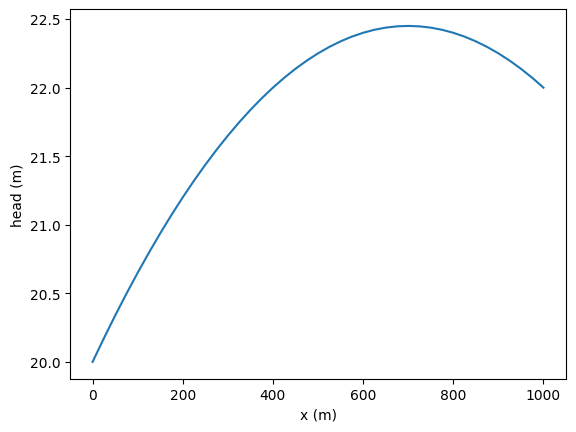

In [38]:
P = 0.001
k = 10
D = 10
h1 = 20
h2 = 22
N = 40
L = 1000

d0 = -2 * np.ones(N + 1)
d0[0] = 1
d0[-1] = 1
dplus1 = np.ones(N)
dplus1[0] = 0
dmin1 = np.ones(N)
dmin1[-1] = 0
A = np.diag(d0, 0) + np.diag(dplus1, 1) + np.diag(dmin1, -1)

delX = L / N
rhs = (-P * delX ** 2 / k / D) * np.ones(N + 1)
rhs[0] = h1
rhs[-1] = h2

h = np.linalg.solve(A, rhs)

x = np.linspace(0, L, N + 1)
plt.plot(x, h)
plt.xlabel('x (m)')
plt.ylabel('head (m)')
print('maximum head ', np.max(h))

<a href="#ex5answer">Answers to Exercise 5</a>

### 固结

饱和粘土的变形是一个缓慢的过程，称为固结。在土壤压缩过程中，孔隙率减少，因此可供孔隙水使用的空间变小。因此，在压缩过程中，需要将一些孔隙水排出土壤。由于粘土的渗透性较小，这可能需要相当长的时间。有关固结过程的详细描述可以在 Verruijt 2012 年的《土壤力学》第 15-17 章中找到，见此 [链接](http://geo.verruijt.net/)。

考虑高度为 $h$ 的土壤中的一维固结。土壤样本中的水压力 $p$ 由下述微分方程控制：

$$\frac{\partial p}{\partial t} = c_v \frac{\partial^2 p}{\partial z^2}$$

其中 $z$ 是垂直坐标（向上为正），$c_v$ 是固结系数。我们考虑水可以从顶部排出，但不能从底部排出的情况，因此底部的边界条件为：

$$z=0 \qquad \frac{\partial p}{\partial z} = 0$$

顶部的边界条件为：

$$z=h \qquad p = 0$$

在时间 $t=0$ 时施加一个恒定荷载，导致土壤样本内部初始呈现均匀压力 $q$（除了在 $z=0$ 的位置，那里压力始终为零）：

$$t=0 \qquad p = q$$

<img src="http://i.imgur.com/4xdeoxw.png" alt="固结" width=400pt>

土壤中压力随时间的变化是通过数值方法（准确地说是完全隐式有限差分法）进行模拟的。压力在 $N+1$ 个点上进行计算，这些点均匀分布在 $z=0$ 到 $z=h$ 之间。点的标记为 $z_0$ 到 $z_{N}$，其中 $z_n=n\Delta z$，$\Delta z$ 是点之间的垂直距离。在点 $z_n$ 处的压力称为 $p_n$。每个时间步长 $\Delta t$ 都会计算一个独立的解。时间导数的近似为：

$$\frac{\partial p}{\partial t} \approx \frac{p_n(t) - p_n(t-\Delta t)}{\Delta t}$$

而空间导数的近似为：

$$\frac{\partial^2 p}{\partial z^2} \approx \frac{p_{n-1}(t) -2p_n(t) + p_{n+1}(t)}{(\Delta z)^2}$$

将这些导数的近似值代入并整理得到以下方程：

$$p_{n-1}(t) - (2+\mu)p_n(t) + p_{n+1}(t) = -\mu p_n(t-\Delta t)$$

其中 

$$\mu = \frac{(\Delta z)^2}{c_v \Delta t}$$

这是一个关于时间 $t$ 的压力方程，涉及点 $(n-1)$、$n$ 和 $(n+1)$，假设在时间 $t-\Delta t$ 的压力已知。

对于 $n=0$ 和 $n=N$ 的方程是不同的。
在样本底部（$n=0$），边界条件为 $\partial p/\partial z = 0$。可以在 $z_0=0$ 处近似计算导数为：

$$\left(\frac{\partial p}{\partial z}\right)_{z=0} \approx \frac{(p_1-p_{-1})}{2\Delta z}=0$$

其中 $p_{-1}$ 是 $z_0$ 下方 $\Delta z$ 处的压力。导数为零时 $p_{-1}=p_1$，代入 $n=0$ 的方程可得：

$$- (2+\mu)p_n(t) + 2p_{n+1}(t) = -\mu p_n(t-\Delta t)$$

对于 $n=N$ 的方程则更简单，因为在样本顶部（$n=N$），压力固定为 $p_N=0$。

作为一个例子，对于 $N=4$ 的方程系统为：

$$
\left(
\begin{array}{ccccc}
-(2+\mu) & 2 & 0 & 0 & 0 \\
1 & -(2+\mu) & 1 & 0 & 0 \\
0 & 1 & -(2+\mu) & 1 & 0 \\
0 & 0 & 1 & -(2+\mu) & 1 \\
0 & 0 & 0 & 0 & 1 \\
\end{array}
\right)
\left(
\begin{array}{c}
p_0(t) \\
p_1(t) \\
p_2(t) \\
p_3(t) \\
p_4(t) \\
\end{array}
\right)
=
\left(
\begin{array}{c}
-\mu p_0(t-\Delta t) \\
-\mu p_1(t-\Delta t) \\
-\mu p_2(t-\Delta t) \\
-\mu p_3(t-\Delta t) \\
0 \\
\end{array}
\right)
$$

通过逐步进行时间计算获得解。矩阵只需计算一次，因为它在时间上是恒定的。每个时间步长，需要计算新的右侧并求解一个包含 $N+1$ 个方程的线性系统。如果将矩阵称为 $A$，而基于 $t-\Delta t$ 时的压力构造的右侧向量称为 $\vec{r}(t-\Delta t)$，那么在时间 $t$ 时的压力 $\vec{p}(t)$ 通过解决系统

$$A\vec{p}(t) = \vec{r}(t-\Delta t)$$

来获得。

请注意，所呈现的数值解法是近似的，仅在时间步长 $\Delta t$ 和空间离散化 $\Delta z$ 选择足够小的情况下，才能给出准确的解。

### 练习 6. 一维固结

考虑一个厚度为 2 米的粘土层的固结过程。在时间 \( t=0 \) 时施加均匀荷载，导致压力单位增加，即 \( p(t=0)=1 \)。粘土的固结系数为 \( c_v=1 \cdot 10^{-6} \) m²/s。使用上述数值方法模拟固结过程。设定 \( N=40 \) 和时间步长 \( \Delta t=4 \cdot 10^4 \) 秒。进行 50 次时间步长的计算，并在每 10 次时间步长时绘制粘土中的压力分布。添加坐标轴标签和图例。将你的解与 Veruit (2012) 图 16.2 中的图形进行比较（注意，Verruijt 将 \( p \) 绘制在水平轴上）。你的图的最后一行应近似于 Verrujt 图中的线 \( c_v t / h^2=0.5 \)。

确保你的 Python 代码：

* 计算所有 50 次时间步长的所有 \( N+1 \) 点的压力，并在 10、20、30、40 和 50 次时间步长后绘制结果。
* 在 10、20、30、40 和 50 次时间步长后，将最大压力值打印到屏幕上。

maximum value after 10 timesteps is: 0.9425826615266134
maximum value after 20 timesteps is: 0.7742325163427506
maximum value after 30 timesteps is: 0.6117657473484334
maximum value after 40 timesteps is: 0.4801227573807983
maximum value after 50 timesteps is: 0.37636878032217186


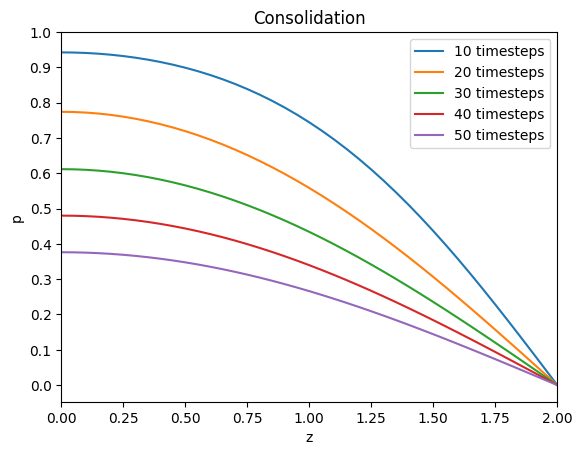

In [46]:
cv = 1e-6
h = 2
N = 40
delt = 4e4
#
delz = h / N
mu = delz ** 2 / (cv * delt)

d0 = -(2 + mu) * np.ones(N + 1)
d0[-1] = 1
dp1 = np.ones(N)
dp1[0] = 2
dm1 = np.ones(N)
dm1[-1] = 0
A = np.diag(d0) + np.diag(dp1, 1) + np.diag(dm1, -1)

p = np.ones(N + 1)
for i in range(5):
    for j in range(10):
        rhs = -mu * p
        rhs[-1] = 0
        p = np.linalg.solve(A, rhs)
    plt.plot(np.arange(0, h + 0.01, delz), p, label=str((i + 1) * 10) + ' timesteps')
    print('maximum value after', 10 * ( i + 1), 'timesteps is:', p[0])
plt.xlim(0, 2)
plt.legend(loc='best')
plt.xlabel('z')
plt.ylabel('p')
plt.yticks(np.linspace(0, 1, 11))
plt.title('Consolidation');

<a href="#ex6answer">Answers to Exercise 6</a>

### 矩阵的逆

如前所述，矩阵 `A` 的值在时间上不发生变化。因此，计算并存储矩阵的逆比反复调用 `np.linalg.solve` 方法更有效。可以使用 `linalg` 包中的 `inv` 函数来计算矩阵的逆。如果矩阵 `A` 的逆称为 `Ainv`，那么压力的解可以通过矩阵乘法将 `Ainv` 与右侧相乘来获得。例如，在本笔记本中的第一个问题中，通过三个点拟合抛物线，可以按如下方式计算矩阵的逆以获得解：

In [44]:
A = np.array([[ 4, -2, 1],
              [ 1,  1, 1],
              [16,  4, 1]])
rhs = np.array([2,-1, 4])
Ainv = np.linalg.inv(A)
sol = Ainv @ rhs
print('sol:', sol)

sol: [ 0.44444444 -0.55555556 -0.88888889]


### 练习 7. 重新审视一维固结

修改你的第 6 题解决方案，通过计算并存储矩阵的逆，然后通过将矩阵的逆与右侧向量相乘来计算解。这样可以提高计算效率。确保你的代码在每个时间步长后输出压力分布，并在指定的时间步长后打印最大压力值。

maximum value after 10 timesteps is: 0.9425826615266134
maximum value after 20 timesteps is: 0.7742325163427506
maximum value after 30 timesteps is: 0.611765747348433
maximum value after 40 timesteps is: 0.48012275738079746
maximum value after 50 timesteps is: 0.37636878032217125


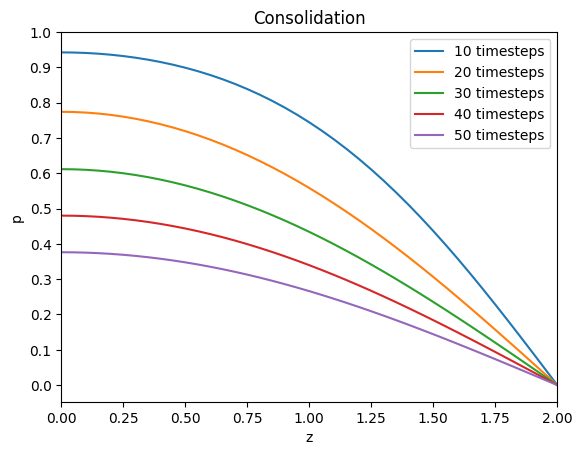

In [45]:
cv = 1e-6  # m^2/s
h = 2  # m
N = 40
delt = 4e4  # seconds
#
delz = h / N
mu = delz ** 2 / (cv * delt)

d0 = -(2 + mu) * np.ones(N + 1)
d0[-1] = 1
dp1 = np.ones(N)
dp1[0] = 2
dm1 = np.ones(N)
dm1[-1] = 0
A = np.diag(d0) + np.diag(dp1, 1) + np.diag(dm1, -1)
Ainv = np.linalg.inv(A)

p = np.ones(N + 1)
for i in range(5):
    for j in range(10):
        rhs = -mu * p
        rhs[-1] = 0
        p = Ainv @ rhs
    plt.plot(np.arange(0, h + 0.01, delz), p, label=str((i + 1) * 10) + ' timesteps')
    print('maximum value after', 10 * ( i + 1), 'timesteps is:', p[0])
plt.xlim(0, 2)
plt.legend(loc='best')
plt.xlabel('z')
plt.ylabel('p')
plt.yticks(np.linspace(0, 1, 11))
plt.title('Consolidation');

<a href="#ex7answer">Answers to Exercise 7</a>

### 稀疏矩阵

我们迄今为止用于构造有限差分解的矩阵的过程效率不高，因为创建了一个主要由零组成的完整矩阵。非零值仅出现在三个对角线上。更有效的例程存储被称为 *稀疏矩阵*。在稀疏矩阵中，仅存储矩阵中非零值的位置和数值。`scipy.sparse` 包中提供了稀疏矩阵的功能。可以使用 `diags` 函数从对角线创建稀疏矩阵，该函数接受一个包含对角线数组的列表和一个包含对角线编号的列表。例如，矩阵

$$
\left(
\begin{array}{cccc}
2 & 3 & 0 & 0 \\
1 & 2 & 3 & 0 \\
0 & 1 & 2 & 3 \\
0 & 0 & 1 & 2 \\
\end{array}
\right)
$$

可以这样创建：

In [42]:
import scipy.sparse as sp
A = sp.diags([1 * np.ones(3), 
              2 * np.ones(4), 
              3 * np.ones(3)], 
             [-1, 0, 1], format='csc')
print('Sparse matrix A')
print(A) # Gives the way A is stored: row, column, value
print('Full matrix A as an array')
print(A.toarray())  # Returns the equivalent full array

Sparse matrix A
<Compressed Sparse Column sparse matrix of dtype 'float64'
	with 10 stored elements and shape (4, 4)>
  Coords	Values
  (1, 0)	1.0
  (0, 0)	2.0
  (2, 1)	1.0
  (1, 1)	2.0
  (0, 1)	3.0
  (3, 2)	1.0
  (2, 2)	2.0
  (1, 2)	3.0
  (3, 3)	2.0
  (2, 3)	3.0
Full matrix A as an array
[[2. 3. 0. 0.]
 [1. 2. 3. 0.]
 [0. 1. 2. 3.]
 [0. 0. 1. 2.]]


有多种方法可以存储稀疏矩阵。在上述代码中，稀疏矩阵 `A` 以 *压缩稀疏列* 格式存储（指定为 `'csc'`）。这种格式的优缺点可以在 [这里](http://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csc_matrix.html) 找到。`A` 现在是一个稀疏矩阵对象。（注意，对于稀疏矩阵对象，乘法符号并不是进行逐项相乘。）通过 `scipy.sparse.linalg` 模块的 `spsolve` 函数，可以得到方程组 $Ax=b$ 的解。

In [43]:
from scipy.sparse.linalg import spsolve
print('type of A:', type(A))
b = np.arange(4)
x = spsolve(A,b)  # x is solution of Ax=b
print('right-hand-side defined as:', b)
print('verify A @ x gives same:', A @ x)

type of A: <class 'scipy.sparse._csc.csc_matrix'>
right-hand-side defined as: [0 1 2 3]
verify A @ x gives same: [0. 1. 2. 3.]


稀疏矩阵的主要优点是可以解决比完整矩阵大得多的问题，因为只存储非零的（少量的）元素。求解器 `spsolve` 也利用了矩阵的稀疏性，通常会更快。

### 练习 8：稀疏矩阵

重新进行练习 5，但这次使用 *稀疏* 矩阵。使用参数 $h_1^*=42$，$h_2^*=40$，$N=10000$。其他参数与练习 2 相同。创建两条运河之间的水头图。

**警告**：当您尝试使用常规（完整）矩阵和 $N=10000$ 解决该问题时，可能会耗尽计算机内存，求解可能需要 *很* 长时间，或者您的程序可能会挂起。请勿尝试此操作，但如果您意外地这样做并且您的笔记本无法恢复，请尝试点击菜单栏顶部的 'Kernel'，然后点击 'Restart'。

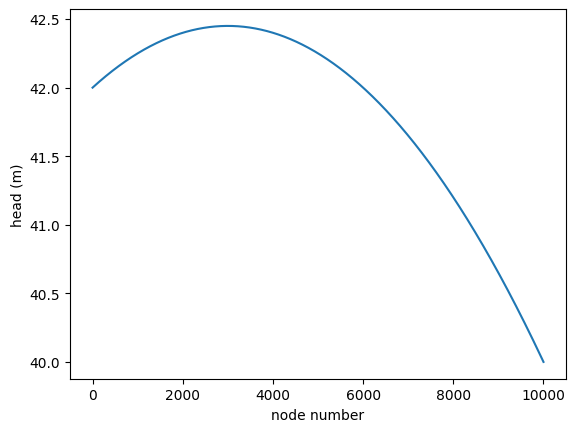

In [41]:
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve 
k = 10
D = 10
h1star = 42
h2star = 40
L = 1000
P = 0.001
N = 10000
d0 = -2 * np.ones(N + 1)
d0[0] = 1
d0[-1] = 1
dplus1 = np.ones(N)
dplus1[0] = 0
dmin1 = np.ones(N)
dmin1[-1] = 0
A = diags([dmin1, d0, dplus1], [-1, 0, 1], format='csc')
delx = L / N
rhs = -P * delx ** 2 / (k * D) * np.ones(N + 1)
rhs[0] = h1star
rhs[-1] = h2star
h = spsolve(A, rhs)
plt.plot(h)
plt.xlabel('node number')
plt.ylabel('head (m)');

<a href="#ex8answer">Answers to Exercise 8</a>

### Solutions to the exercises

<a name="ex1answer">Answers to Exercise 1</a>

In [ ]:
tp = np.array([0, 0.25, 0.5, 0.75])
yp = np.array([ 3, 1, -3, 1])
A = np.zeros((4, 4))
rhs = np.zeros(4)
for i in range(4):
    A[i] = np.cos(1 * np.pi * tp[i]), np.cos(2 * np.pi * tp[i]), \
           np.cos(3 * np.pi * tp[i]), np.cos(4 * np.pi * tp[i])  # Store one row at a time
    rhs[i] = yp[i]
sol = np.linalg.solve(A, rhs)
print('a,b,c,d: ',sol)

t = np.linspace(0, 1, 100)
y = sol[0] * np.cos(1 * np.pi * t) + sol[1] * np.cos(2 * np.pi * t) + \
    sol[2] * np.cos(3 * np.pi * t) + sol[3] * np.cos(4 * np.pi * t)
plt.plot(t, y, 'b', label='wave')
plt.plot(tp, yp, 'ro', label='data')
plt.legend(loc='best');

<a href="#back1">Back to Exercise 1</a>

<a name="ex2answer">Answers to Exercise 2</a>

In [ ]:
def fpoly(x, N):
    rv = np.zeros(N + 1)
    for n in range(N + 1):
        rv[n] = x ** n
    return rv

print(fpoly(2, 4))

<a href="#back2">Back to Exercise 2</a>

<a name="ex3answer">Answers to Exercise 3</a>

In [ ]:
def solvepoly(x, y):
    N = len(x) - 1
    mat = np.zeros((N+1, N+1))
    for n in range(N+1):
        mat[n] = fpoly(x[n], N)
    par = np.linalg.solve(mat, y)
    return par
    
xp = np.array([0, 1, 2, 3])
yp = np.array([3, 1, -3, 1])
a = solvepoly(xp, yp)
print(a)

<a href="#back3">Back to Exercise 3</a>

<a name="ex4answer">Answers to Exercise 4</a>

In [ ]:
def fpolyeval(x, a):
    rv = np.zeros(len(x))
    for n in range(len(a)):
        rv += a[n] * x ** n
    return rv

print(fpolyeval(xp, a))

In [ ]:
x = np.linspace(-1,4,100)
y = fpolyeval(x, a)
plt.plot(xp, yp, 'ko', label='data')
plt.plot(x, y, label='fitted poly')
plt.legend(loc='best');

<a href="#back4">Back to Exercise 4</a>

<a name="ex5answer">Answers to Exercise 5</a>

In [ ]:
k = 10
D = 10
h1star = 20
h2star = 22
L = 1000
P = 0.001
N = 40

d0 = -2 * np.ones(N + 1)  # main diagonal
d0[0] = 1  # first value of main diagonal is 1
d0[-1] = 1 # last value of main diagonal is 1
dplus1 = np.ones(N) # diagonal right above main diagonal, position 1
dplus1[0] = 0    # first value of diagonal is 0
dmin1 = np.ones(N)  # diagonal right below main diagonal, position -1
dmin1[-1] = 0    # last value of diagonal is 0
A = np.diag(d0, 0) + np.diag(dplus1, 1) + np.diag(dmin1, -1)
# Right hand side
delx = L / N
rhs = -P * delx ** 2 / (k * D) * np.ones(N + 1)
rhs[0] = h1star
rhs[-1] = h2star
# Solve for the head and plot
h = np.linalg.solve(A, rhs)
x = np.linspace(0, L, N + 1)
plt.plot(x, h)
plt.xlabel('x (m)')
plt.ylabel('head (m)')
print('maximum head ', np.max(h))

In [ ]:
cv = 1e-6  # m^2/s
h = 2  # m
N = 40
delt = 4e4  # seconds
#
delz = h / N
mu = delz ** 2 / (cv * delt)

d0 = -(2 + mu) * np.ones(N + 1)
d0[-1] = 1
dp1 = np.ones(N)
dp1[0] = 2
dm1 = np.ones(N)
dm1[-1] = 0
A = np.diag(d0) + np.diag(dp1, 1) + np.diag(dm1, -1)

p = np.ones(N + 1)
for i in range(5):
    for j in range(10):
        rhs = -mu * p
        rhs[-1] = 0
        p = np.linalg.solve(A, rhs)
    plt.plot(np.arange(0, h + 0.01, delz), p, label=str((i + 1) * 10) + ' timesteps')
    print('maximum value after', 10 * ( i + 1), 'timesteps is:', p[0])
plt.xlim(0, 2)
plt.legend(loc='best')
plt.xlabel('z')
plt.ylabel('p')
plt.yticks(np.linspace(0, 1, 11))
plt.title('Consolidation');

<a href="#back5">Back to Exercise 5</a>

<a name="ex6answer">Answers to Exercise 6</a>

In [ ]:
cv = 1e-6  # m^2/s
h = 2  # m
N = 40
delt = 4e4  # seconds
#
delz = h / N
mu = delz ** 2 / (cv * delt)

d0 = -(2 + mu) * np.ones(N + 1)
d0[-1] = 1
dp1 = np.ones(N)
dp1[0] = 2
dm1 = np.ones(N)
dm1[-1] = 0
A = np.diag(d0) + np.diag(dp1, 1) + np.diag(dm1, -1)
Ainv = np.linalg.inv(A)

p = np.ones(N + 1)
for i in range(5):
    for j in range(10):
        rhs = -mu * p
        rhs[-1] = 0
        p = Ainv @ rhs
    plt.plot(np.arange(0, h + 0.01, delz), p, label=str((i + 1) * 10) + ' timesteps')
    print('maximum value after', 10 * ( i + 1), 'timesteps is:', p[0])
plt.xlim(0, 2)
plt.legend(loc='best')
plt.xlabel('z')
plt.ylabel('p')
plt.yticks(np.linspace(0, 1, 11))
plt.title('Consolidation');

<a href="#back7">Back to Exercise 7</a>

<a name="ex8answer">Answers to Exercise 8</a>

In [ ]:
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve 
k = 10
D = 10
h1star = 42
h2star = 40
L = 1000
P = 0.001
N = 10000
d0 = -2 * np.ones(N + 1)  # main diagonal
d0[0] = 1  # first value of main diagonal is 1
d0[-1] = 1 # last value of main diagonal is 1
dplus1 = np.ones(N) # diagonal right above main diagonal, position 1
dplus1[0] = 0    # first value of diagonal is 0
dmin1 = np.ones(N)  # diagonal right below main diagonal, position -1
dmin1[-1] = 0    # last value of diagonal is 0
A = diags([dmin1, d0, dplus1], [-1, 0, 1], format='csc')
# Right hand side
delx = L / N
rhs = -P * delx ** 2 / (k * D) * np.ones(N + 1)
rhs[0] = h1star
rhs[-1] = h2star
h = spsolve(A, rhs)
plt.plot(h)
plt.xlabel('node number')
plt.ylabel('head (m)');

<a href="#back8">Back to Exercise 8</a>